
<div class="alert alert-block alert-success">
    <h1 align="center">Deep Learning in Python</h1>
    <h2 align="center">Facial Emotion Recognition with using CNN</h3>
    <h3 align="center"><a href="http://www.ipowersoft.com">Kothandaraman Sikamani</a></h5>
</div>

**Deep Learning Problem:**  
Facial expressions are one of the ways humans communicate. Deep learning approaches in human and computer interactions are used in artificial intelligence research as an effective system application process. The detection of emotions or facial expressions in psychology necessitates the examination and evaluation of decisions in anticipating a person's feelings or a group of people communicating. This study proposes the development of a system that can predict and recognize the classification of facial emotions using the Convolution Neural Network (CNN) algorithm and feature extraction. 

Data preprocessing, facial feature extraction, and facial emotion classification are the three key steps in the notebook. Facial expressions were predicted with the accuracy of <span style="color:crimson;">62.66</span> percent with using the Convolutional Neural Network (CNN). This algorithm was evaluated on a publicly available dataset from the <span style="color:crimson;">FER2013</span> database, which has 35887 48x48 grayscale face images each representing one of the emotions.  

**ML Approaches or Methods using our App:**  
The ML approach used in both cases remains the same, which is deep learning using Convolutional Neural Networks (CNNs) for facial emotion recognition.  


**Data source:**  
The data can be obtained from the website at https://www.kaggle.com/datasets/deadskull7/fer2013

GitHub Link: https://github.com/ipowersoft/Facial-Emotion-Recognition-using-CNN


**Table of contents of this notebook:**

**1.** [Importing necessary libraries](#1)

**2.** [Loading the data](#2)

**3.** [Data pre-processing](#3)

**4.** [Design a model](#4)

**5.** [Visualizations](#5)

**6.** [Fine tuning](#6)

**7.** [Conclusion/Summary](#7)


<h1 id="1"> <center>1. Importing necessary libraries</center> </h1> <a id="1"></a>

Installed all required libraries and imported all required modules to get access to code.
Here I have imported the list of modules are,

- NumPy (import numpy as np): NumPy is a library for working with arrays and matrices in Python. It provides various mathematical functions and operations that make it easier to work with numerical data. In this code, NumPy is being imported with the alias np, which makes it easier to refer to the library throughout the code.  


- Pandas (import pandas as pd): Pandas is a library for working with tabular data in Python. It provides a variety of tools for data manipulation, analysis, and visualization. In this code, Pandas is being imported with the alias pd, which makes it easier to refer to the library throughout the code.  


- Matplotlib (import matplotlib.pyplot as plt): Matplotlib is a library for creating data visualizations in Python. It provides various functions and tools for creating plots, charts, and graphs. In this code, the pyplot submodule of Matplotlib is being imported with the alias plt, which makes it easier to refer to the library throughout the code.  

And other list of libraries are,   
- Sequential, EarlyStopping, regularizers, ModelCheckpoint,EarlyStopping 
- Adam,RMSprop,SGD,Adamax     
- ImageDataGenerator,load_img  
- Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input  
- confusion_matrix, classification_report
- train_test_split, accuracy_score

In [1]:
%%capture
!pip install scikit-plot
!pip install --upgrade tensorflow
!pip install visualkeras
!pip install Pillow

In [2]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
# from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import visualkeras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1 id="1"> <center>2. Loading the data</center> </h1> <a id="2"></a>

### Function: pandas.read_csv()

The read_csv() function of the pandas module is used to read a comma-separated values (CSV) file into a pandas DataFrame.  

- It takes the file path as input and returns a DataFrame containing the data from the file.  
- In the given code snippet, the function is used to read data from the "fer2013.csv" file and store it in the variable data.  
- Overview of data is 35887 rows and 3 columns.  

### Function: DataFrame.sample()

The sample() function of the DataFrame class in pandas module is used to randomly sample data from a DataFrame. It takes the number of samples as input and returns a new DataFrame containing the randomly sampled data. In the given code snippet, the function is used to sample 5 rows from the DataFrame df and display them in the output. This can be useful for getting a quick look at a few rows of data to get a sense of what the data looks like.

In [3]:
data = pd.read_csv("../input/fer2013/fer2013.csv")
data.shape
#data.sample(5)

(35887, 3)

To see the dataset has any missing values.

In [4]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


<h1 id="1"> <center>3. EDA(Exploratory Data Analysis)</center> </h1> <a id="3"></a>

Analyzing and summarizing data sets to understand the main characteristics, patterns, and relationships. Identifying and handling data errors, inconsistencies, and outliers. This involves removing or correcting erroneous data points to ensure data quality.  

In this we will do the following concepts,  

1. Shuffling the data 
2. One Hot Encoding 
3. Standardization
4. Reshaping the data (48,48)
5. Train test validation split
6. Data augmentation using ImageDataGenerator

In [6]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## 3.1 Shuffling the data




Firstly, we will shuffle the data using sample() function and determining fraction as 1 to shuffle the data by changing the rows.

In [7]:
data = data.sample(frac=1)

## 3.2 One Hot Encoding

Then, we will do one hot encoding operation to change the categorical labels as numeric labels to learning algorithm can work better in predictions process.

In [8]:
labels = to_categorical(data[['emotion']], num_classes=7)

Changing image pixels to Numpy array


In [9]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

## 3.3 Standardization

We will change the data structure to feed the standard scaler to implement standardization process to our data. Since StandardScaler() function only takes 2 dimensional array we will reshape the data then apply our scaler to make the mean zero and standard deviation as unit. 

 

In [10]:
pixels = train_pixels.reshape((35887*2304,1))

In [11]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

## 3.4 Reshaping the data (48,48)


After that, we will reshape the data to make our image pixels ready to split operation. 

In [12]:
pixels = train_pixels.reshape((35887, 48, 48,1))

## 3.5 Train test validation split


Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


We can see some train data containing one sample of each class with the help of this plot code.

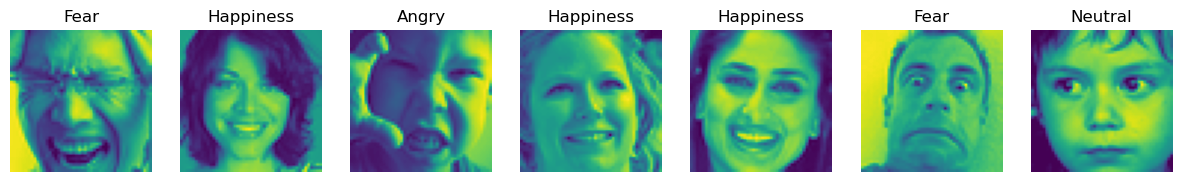

In [15]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

## 3.6 Data augmentation using ImageDataGenerator

We can do data augmentation to have more data to train and validate our model to prevent overfitting. Data augmentation can be done on training and validation sets as it helps the model become more generalize and robust.

In [16]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2) 

In [17]:
datagen.fit(X_train)
valgen.fit(X_val)

In [18]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

Our dataset is ready to feed our model. We will look at our model architecture.

<h1 id="1"> <center>4.  Design a Model </center> </h1> <a id="4"></a>

#### Analysis using Deep Learning Models - Comparing multiple models  
An appropriate model or algorithm based on the problem.
Initializing the model with some initial parameter values. The initial values may be random or based on prior knowledge, depending on the algorithm.
Here the CNN model is involved.

## 4.1 CNN Model

CNN model has many layers with different units such as Convolutional layer, Max pooling layer, Batch normalization and Drop out layer to regularize the model.

In [19]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [20]:
model = cnn_model()

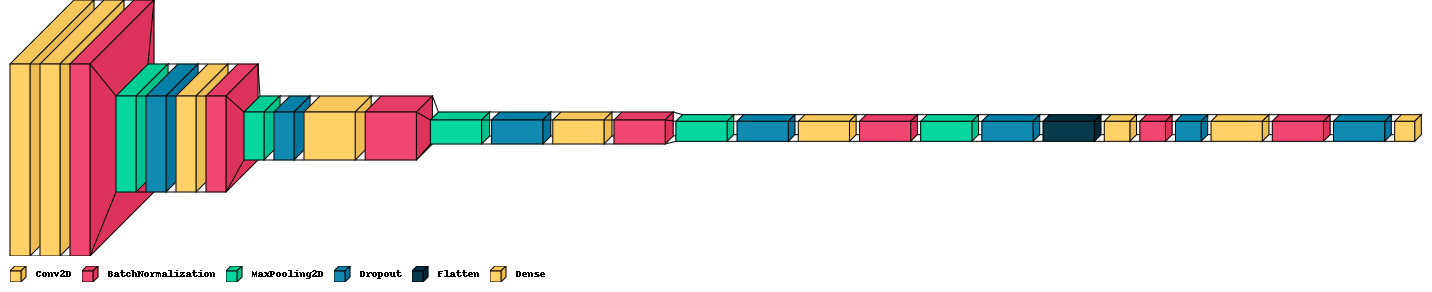

In [21]:
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font) # selected font

Then, we compile our model with Adam optimizer with 0.0001 learning rate and chose metric as accuracy, then loss as categorical crossentropy

In [22]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

## 4.2 Early stopping

Adding checkpointer to implement Early Stopping to prevent overfitting.

In [24]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [25]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))
history = model.fit(train_generator,
                    epochs=30,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

TensorFlow version: 2.13.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/30


2023-08-11 05:21:44.388965: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/455 [============================>.] - ETA: 0s - loss: 6.7908 - accuracy: 0.2191
Epoch 1: val_accuracy improved from -inf to 0.25480, saving model to best_model.h5
455/455 [==============================] - 31s 41ms/step - loss: 6.7822 - accuracy: 0.2190 - val_loss: 2.8554 - val_accuracy: 0.2548
Epoch 2/30
454/455 [============================>.] - ETA: 0s - loss: 2.5777 - accuracy: 0.2913
Epoch 2: val_accuracy improved from 0.25480 to 0.29164, saving model to best_model.h5
455/455 [==============================] - 17s 38ms/step - loss: 2.5779 - accuracy: 0.2913 - val_loss: 2.6652 - val_accuracy: 0.2916
Epoch 3/30
455/455 [==============================] - ETA: 0s - loss: 2.6657 - accuracy: 0.3486
Epoch 3: val_accuracy improved from 0.29164 to 0.36099, saving model to best_model.h5
455/455 [==============================] - 18s 39ms/step - loss: 2.6657 - accuracy: 0.3486 - val_loss: 2.6493 - val_accuracy: 0.3610
Epoch 4/30
454/455 [============================>.] - ETA: 0s - loss:

<h1 id="1"> <center>5. Visualizations</center> </h1> <a id="5"></a>

Creating visual representations of the data using graphs, charts, and plots. This helps in identifying patterns, trends, outliers, and relationships between variables. The visualizations include histograms, box plots, scatter plots, bar charts, and heatmaps.

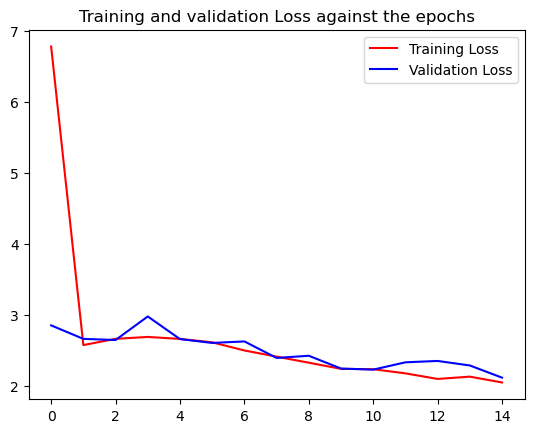

In [26]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.title("Training and validation Loss against the epochs")
plt.legend()

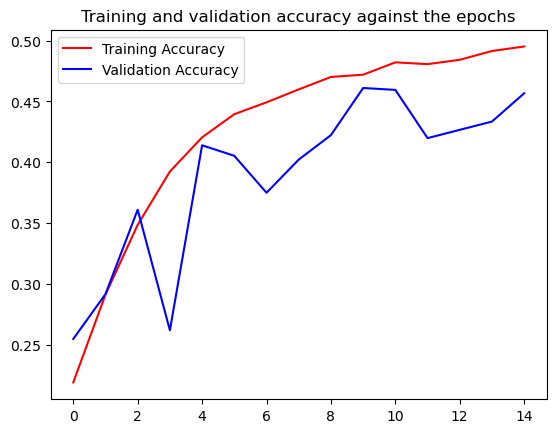

In [27]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.title("Training and validation accuracy against the epochs")
plt.legend()

In [28]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 7ms/step - loss: 2.1486 - accuracy: 0.5001
Test Acc: 0.5001392960548401


In [29]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 1s 4ms/step


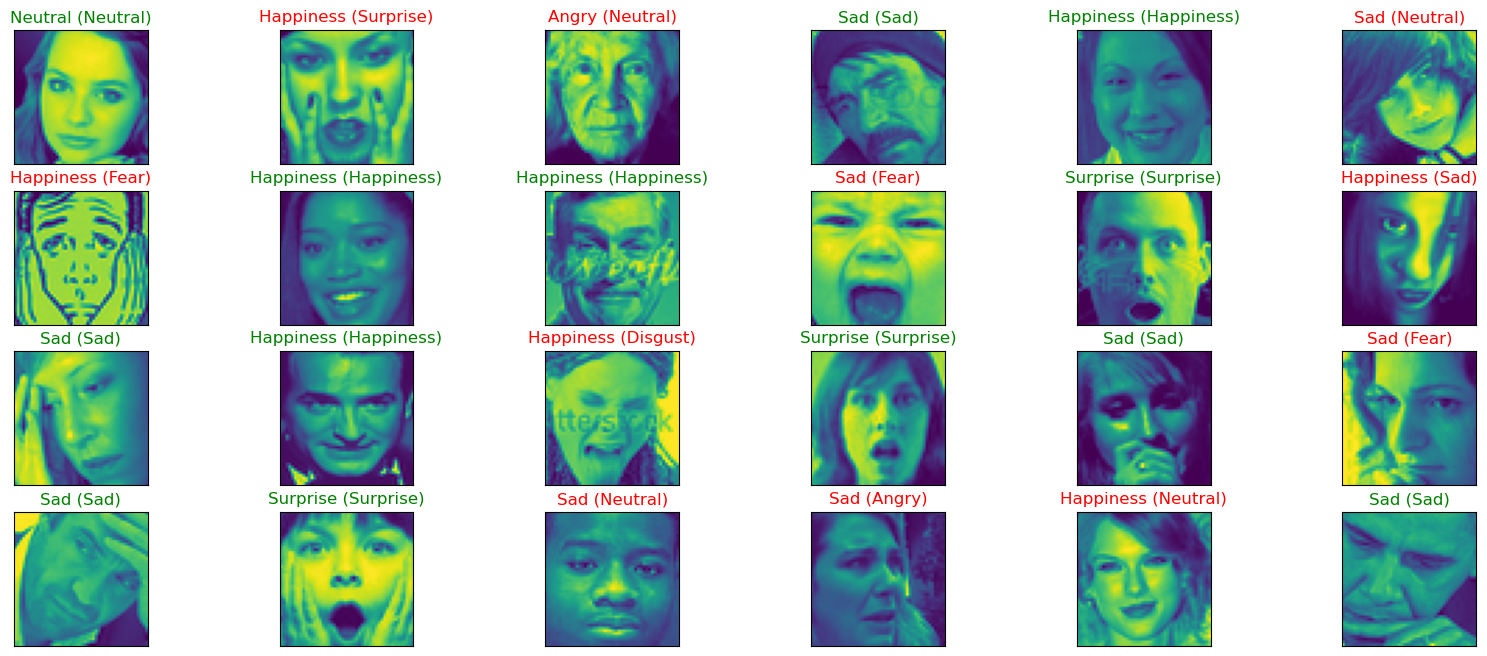

In [30]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

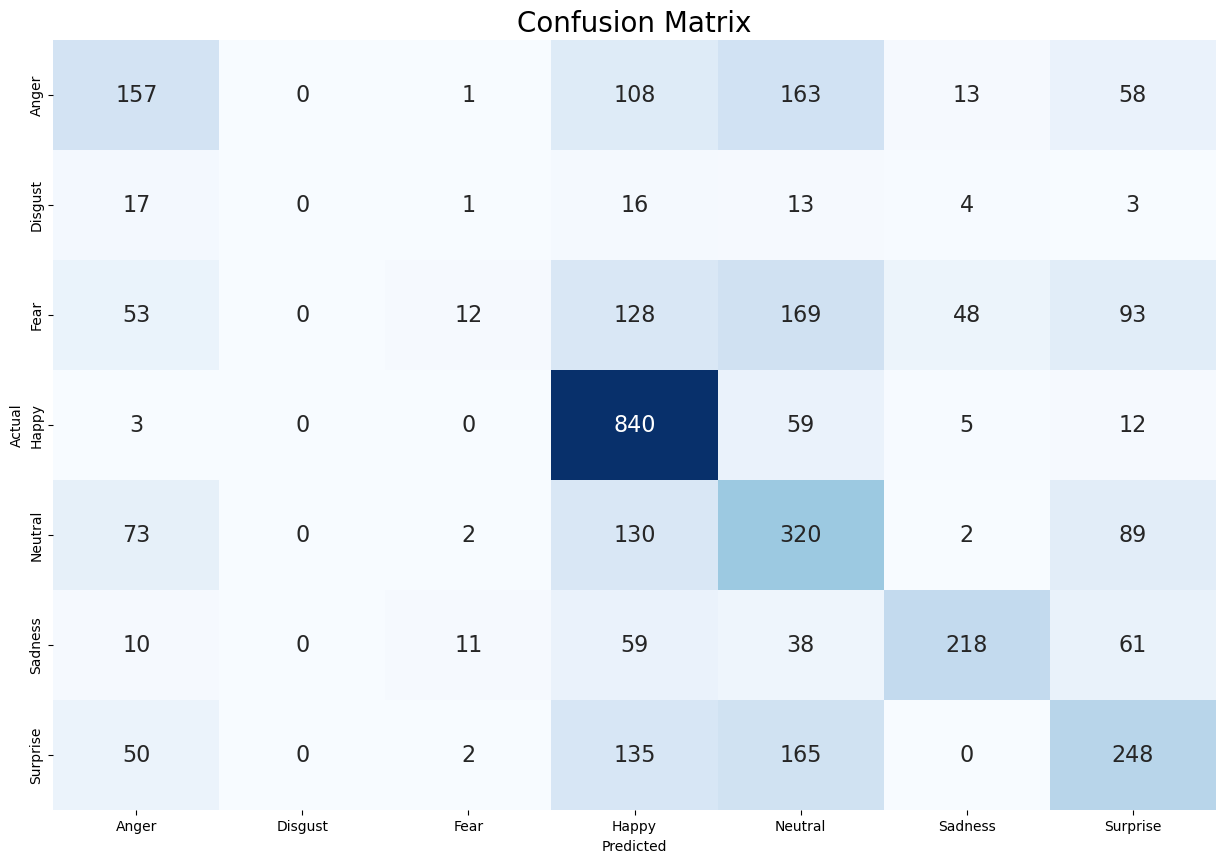

In [31]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.433     0.314     0.364       500
           1      0.000     0.000     0.000        54
           2      0.414     0.024     0.045       503
           3      0.593     0.914     0.719       919
           4      0.345     0.519     0.415       616
           5      0.752     0.549     0.635       397
           6      0.440     0.413     0.426       600

    accuracy                          0.500      3589
   macro avg      0.425     0.391     0.372      3589
weighted avg      0.486     0.500     0.454      3589



<h1 id="1"> <center>6. Fine tuning</center> </h1> <a id="6"></a>

## 6.1 Changing optimizer

Changing Optimizer to Stochastic Gradient Descent (SGD)

In [33]:
model = cnn_model()

In [34]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [35]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 6ms/step - loss: 16.5657 - accuracy: 0.1644
Test Acc: 0.1643911898136139


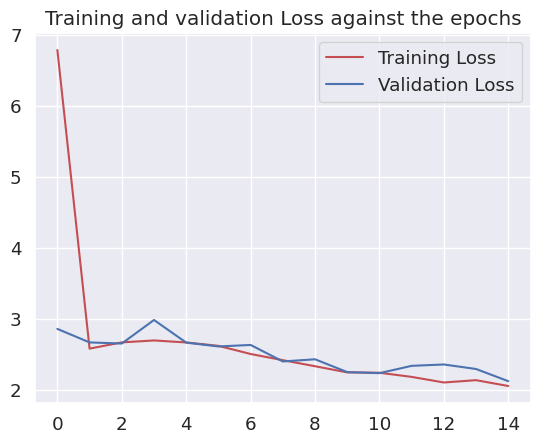

In [36]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.title("Training and validation Loss against the epochs")
plt.legend()

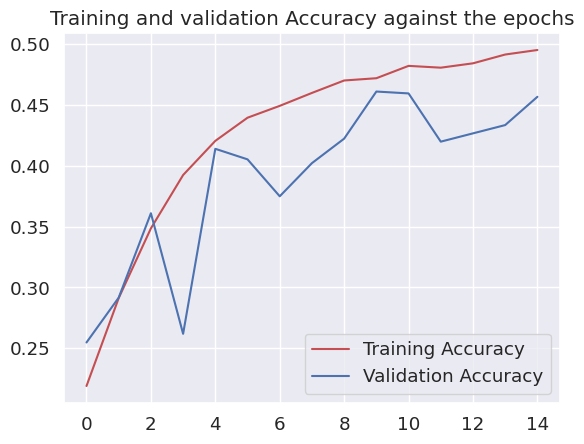

In [37]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.title("Training and validation Accuracy against the epochs")
plt.legend()

The model trained with SGD did not give better results than Adam optimizer.

## 6.2 Changing epoch number

Let's change the epoch number as 50 for the cnn_model.

In [38]:
model = cnn_model()

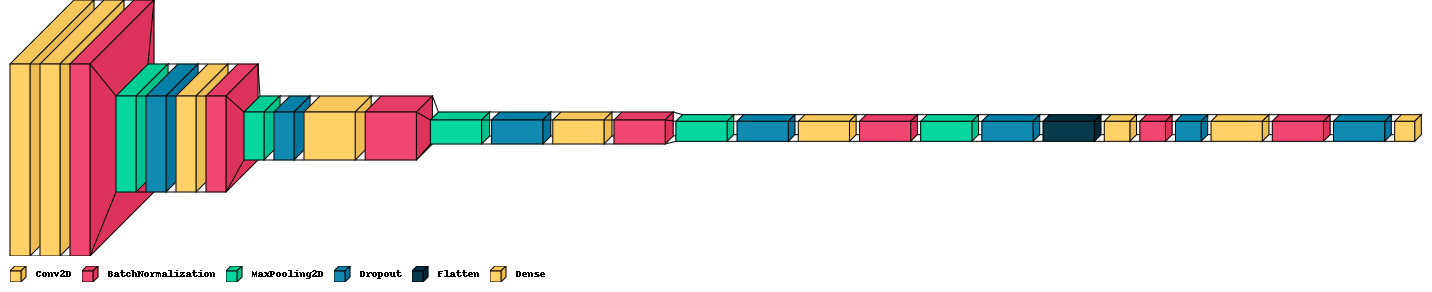

In [39]:
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font) # selected font

In [40]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [41]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 10),
                              ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                              save_best_only=True,mode="max")]

In [42]:
history = model.fit(train_generator,
                    epochs=50,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/50


2023-08-11 05:27:02.494496: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


454/455 [============================>.] - ETA: 0s - loss: 6.9838 - accuracy: 0.2245
Epoch 1: val_accuracy improved from -inf to 0.25170, saving model to best_model.h5
455/455 [==============================] - 24s 40ms/step - loss: 6.9745 - accuracy: 0.2246 - val_loss: 3.0399 - val_accuracy: 0.2517
Epoch 2/50
455/455 [==============================] - ETA: 0s - loss: 2.7502 - accuracy: 0.3200
Epoch 2: val_accuracy improved from 0.25170 to 0.31950, saving model to best_model.h5
455/455 [==============================] - 18s 39ms/step - loss: 2.7502 - accuracy: 0.3200 - val_loss: 2.8139 - val_accuracy: 0.3195
Epoch 3/50
454/455 [============================>.] - ETA: 0s - loss: 2.6766 - accuracy: 0.4024
Epoch 3: val_accuracy improved from 0.31950 to 0.39009, saving model to best_model.h5
455/455 [==============================] - 18s 39ms/step - loss: 2.6768 - accuracy: 0.4025 - val_loss: 2.7619 - val_accuracy: 0.3901
Epoch 4/50
454/455 [============================>.] - ETA: 0s - loss:

In [43]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 6ms/step - loss: 1.4179 - accuracy: 0.5795
Test Acc: 0.5795485973358154


In [44]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 1s 4ms/step


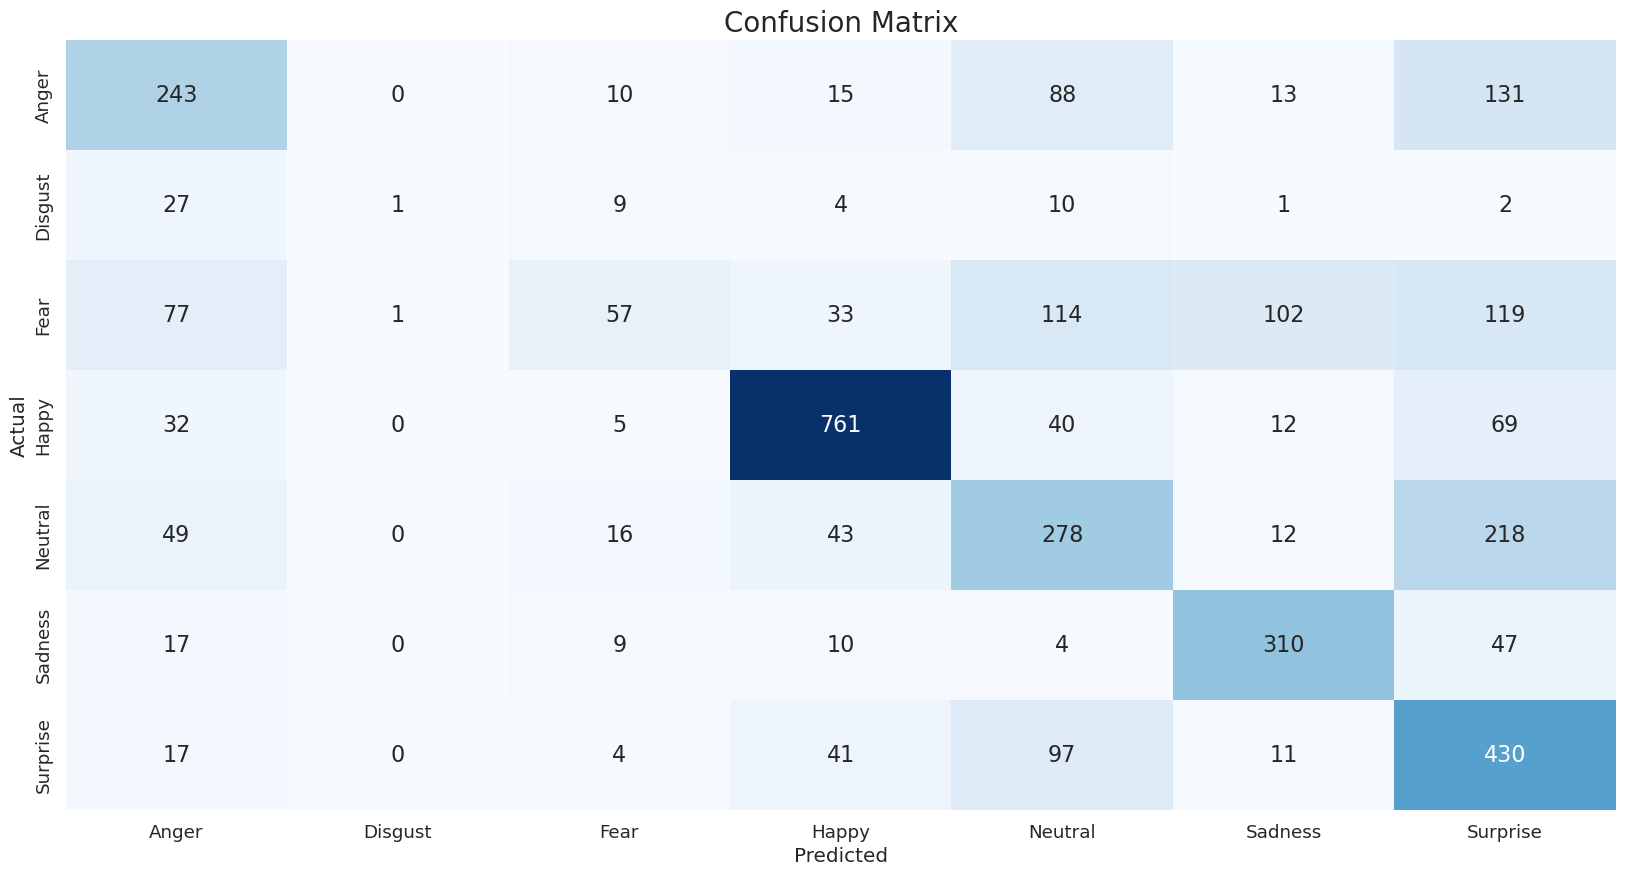

In [45]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [46]:
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.526     0.486     0.505       500
           1      0.500     0.019     0.036        54
           2      0.518     0.113     0.186       503
           3      0.839     0.828     0.834       919
           4      0.441     0.451     0.446       616
           5      0.672     0.781     0.723       397
           6      0.423     0.717     0.532       600

    accuracy                          0.580      3589
   macro avg      0.560     0.485     0.466      3589
weighted avg      0.589     0.580     0.556      3589



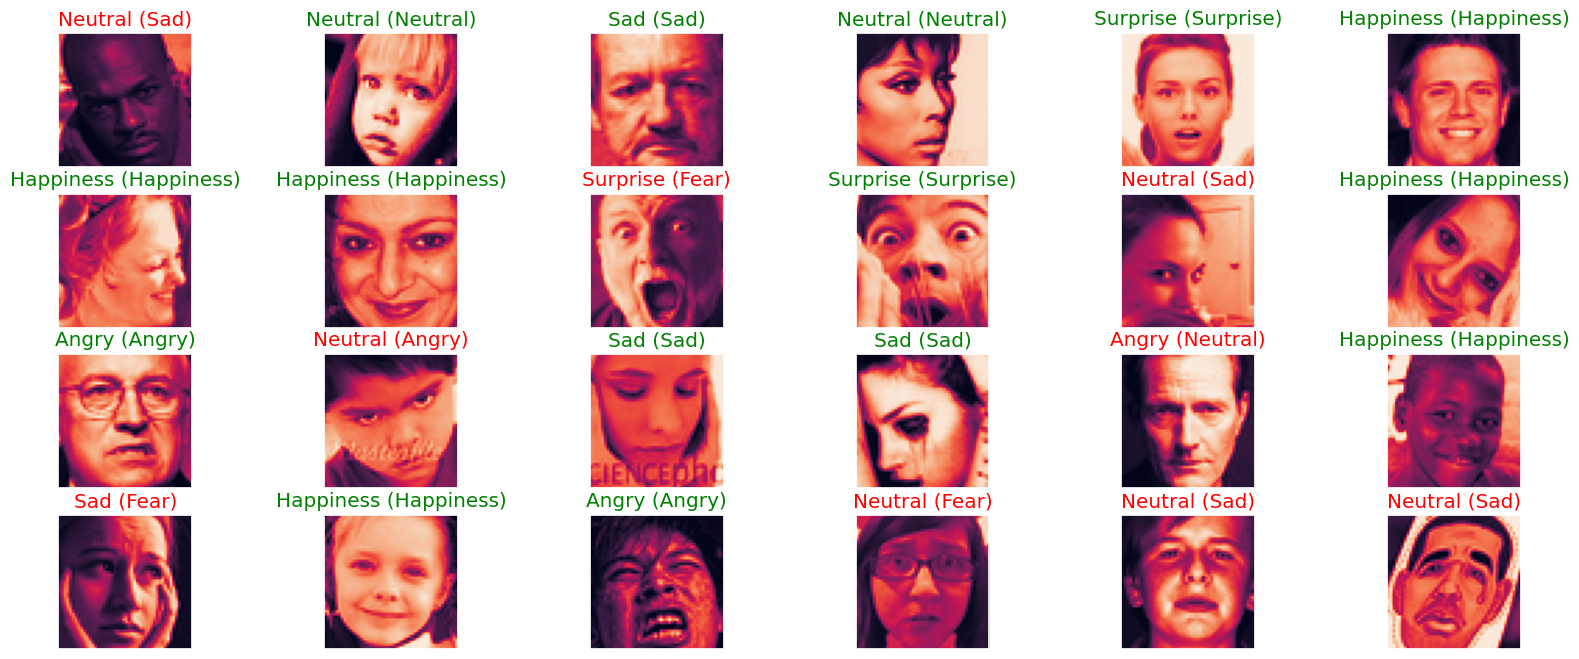

In [47]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

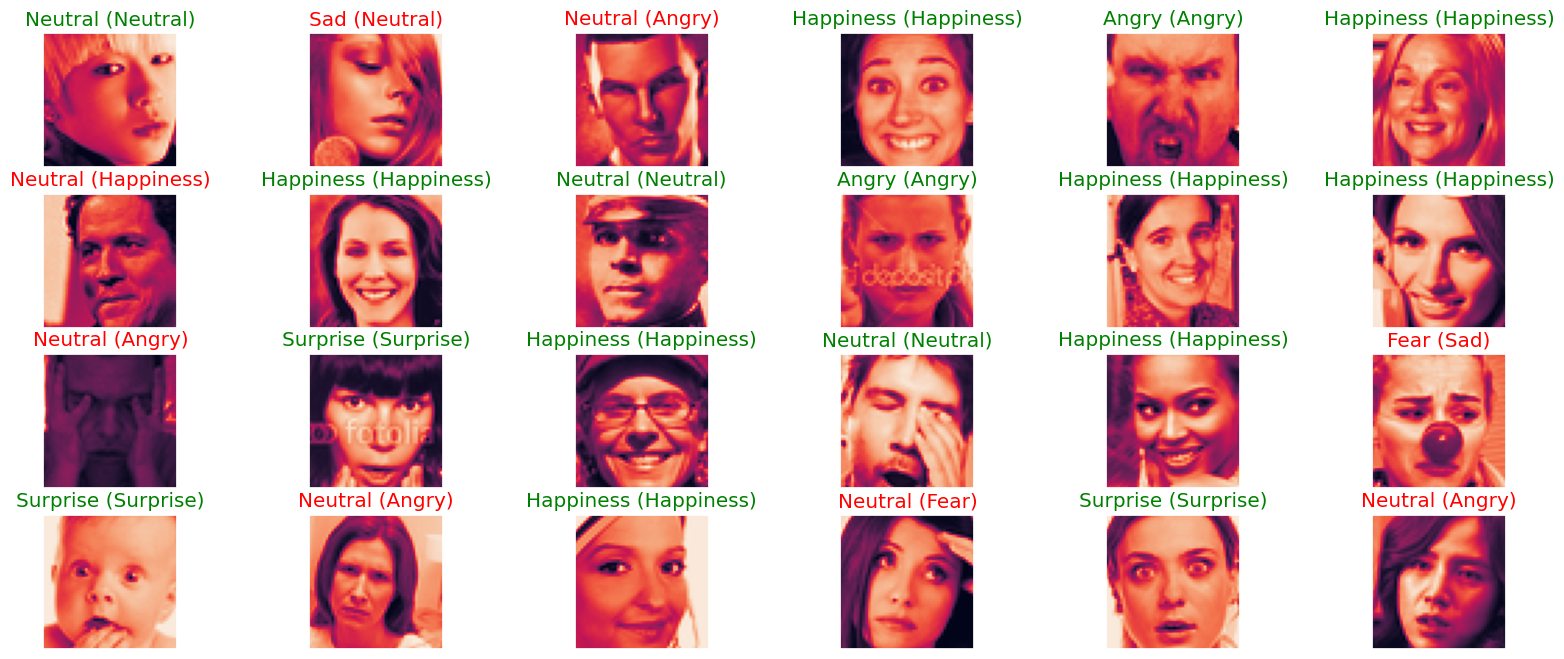

In [48]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

<h1 id="1"> <center>Conclusion/Summary</center> </h1> <a id="7"></a>

The dataset "FER2013" can be used for image classification. The dataset contains images of Human Face Emotions, and the objective is to classify them into one of seven categories (Anger, Disgust, Fear, Happy, Neutral, Sadness and Surprise)

The dataset is loaded and organized into pandas DataFrames for easier handling. The project starts with a Convolutional Neural Network (CNN) model. The CNN model is compiled with categorical cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric. The model is trained using the training dataset and evaluated on the validation dataset. The CNN model is used to make predictions on the test dataset. Training and validation loss and accuracy curves are plotted to visualize the model's performance during training for the CNN model.

The aim is to classify images of Face Emotions into seven categories using a CNN model. The model trained with 50 epochs has better results than the model trained with 30 epochs.

The data can be obtained from the website at https://www.kaggle.com/datasets/deadskull7/fer2013  
Here is the GitHub repo URL for the project work https://github.com/ipowersoft/Facial-Emotion-Recognition-using-CNN